In [1]:
from typing import TypedDict , List
from langgraph.graph import StateGraph

/Users/int1946/Desktop/langraph_practice/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
class MyState(TypedDict):
    name: str
    age: int
    skills: List[str]
    result: str

In [3]:
def Node1(state: MyState)->MyState:
    state['result'] = f"{state['name']},welcome to the system!"
    return state


In [ ]:
def Node2(state: MyState)->MyState:
    state['result'] = state['result'] +"\n" +  f"You are {state['age']} years old" + "\n"
    return state


In [5]:
def Node3(state: MyState)->MyState:
    state['result'] = state['result'] + "\n" + "Your skills are: " + ", ".join(state['skills']) + "\n"
    return state

In [6]:
graph = StateGraph(MyState)

graph.add_node("node1" , Node1)
graph.add_node("node2" , Node2)
graph.add_node("node3" , Node3)

graph.add_edge("node1" , "node2")
graph.add_edge("node2" , "node3")

graph.set_entry_point("node1")
graph.set_finish_point("node3")



In [7]:
app = graph.compile()

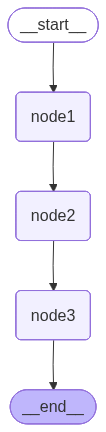

In [8]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [9]:
data = {
    "name": "jaiwanth",
    "age": 20,
    "skills": ["python", "java", "c++"]
}
result = app.invoke(data)
print(result['result'])


jaiwanth,welcome to the system!You are 20 years old
Your skills are: python, java, c++

